## Questão 1 
Juntar todas as imagens em uma única 

In [89]:
# Juntar todos os pinguins em uma unica imagem
from PIL import Image
import os
import matplotlib.pyplot as plt
import numpy as np

p1 = Image.open(r"C:\Users\vish8\OneDrive\Desktop\P7\C209\Computa--o-gr-fica\Projeto\Projeto 1 2025\Projeto 1\P1.png")
p2 = Image.open(r"C:\Users\vish8\OneDrive\Desktop\P7\C209\Computa--o-gr-fica\Projeto\Projeto 1 2025\Projeto 1\P2.png")
p3 = Image.open(r"C:\Users\vish8\OneDrive\Desktop\P7\C209\Computa--o-gr-fica\Projeto\Projeto 1 2025\Projeto 1\P3.jpg")
p4 = Image.open(r"C:\Users\vish8\OneDrive\Desktop\P7\C209\Computa--o-gr-fica\Projeto\Projeto 1 2025\Projeto 1\P4.png")

print(p1.size, p2.size, p3.size, p4.size) #Vendo os fomatos das imagens
print(p1.format, p2.format, p3.format, p4.format)#Extensoes das imagens


(838, 653) (212, 238) (820, 1184) (860, 1109)
PNG PNG JPEG PNG


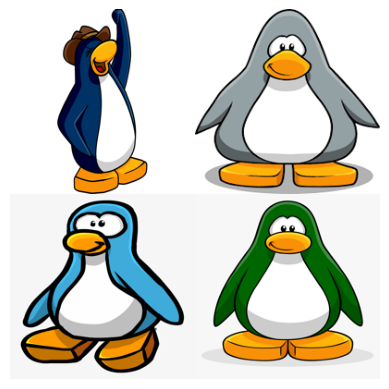

In [105]:
#Convertento para RGB, para ficar todos no mesmo formato
p1 = p1.convert('RGB')
p2 = p2.convert('RGB')
p3 = p3.convert('RGB')
p4 = p4.convert('RGB')

#Padronizando as imagens
tamanho = (200,200)
p1 = p1.resize(tamanho)
p2 = p2.resize(tamanho)
p3 = p3.resize(tamanho)
p4 = p4.resize(tamanho)

#Convertando as imagens para np
np1 = np.array(p1)
np2 = np.array(p2)
np3 = np.array(p3)
np4 = np.array(p4)

#Juntando as imagens
linha1 = np.concatenate((np1, np2), axis=1)
linha2 = np.concatenate((np3, np4), axis=1)
np_final = np.concatenate((linha1, linha2), axis=0)

image = Image.fromarray(np_final)
plt.imshow(image)
plt.axis('off')
plt.savefig('questao1.png')

In [91]:
print(np_final.shape)
print(np_final)

(400, 400, 3)
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[246 246 246]
  [246 246 246]
  [246 246 246]
  ...
  [247 247 247]
  [247 247 247]
  [247 247 247]]

 [[246 246 246]
  [246 246 246]
  [246 246 246]
  ...
  [247 247 247]
  [247 247 247]
  [247 247 247]]

 [[246 246 246]
  [246 246 246]
  [246 246 246]
  ...
  [247 247 247]
  [247 247 247]
  [247 247 247]]]


## Questão 2:
Trocar as cores (mudar a cor dos pinguins para qualquer outra) 

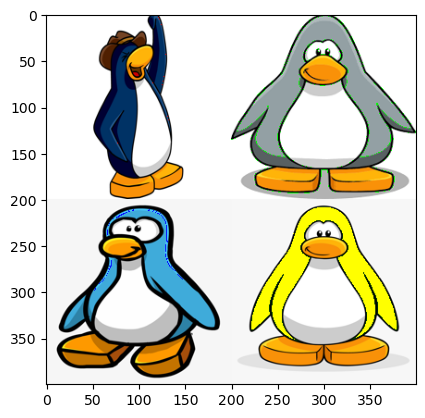

In [106]:
def trocar_cor_intervalo(np_img, cor_min, cor_max, nova_cor):
    mask = np.all((np_img >= cor_min) & (np_img <= cor_max), axis=-1)
    np_img[mask] = nova_cor
    return np_img

# Trocar cores dos pinguins (ajuste os intervalos conforme necessário)
np1 = trocar_cor_intervalo(np1, [20, 30, 90], [40, 60, 110], [255, 0, 0])        # azul escuro → vermelho
np2 = trocar_cor_intervalo(np2, [120, 120, 120], [160, 160, 160], [0, 255, 0])   # cinza → verde
np3 = trocar_cor_intervalo(np3, [70, 150, 200], [110, 200, 255], [0, 0, 255])    # azul claro → azul
np4 = trocar_cor_intervalo(np4, [0, 80, 0], [80, 200, 80], [255, 255, 0])        # verde → amarelo ✅ corrigido!

# Juntar as imagens
linha1 = np.concatenate((np1, np2), axis=1)
linha2 = np.concatenate((np3, np4), axis=1)
np_final = np.concatenate((linha1, linha2), axis=0)

image = Image.fromarray(np_final)
plt.imshow(image)
plt.savefig('Questao2.png')

## Questao 3
espelhamento


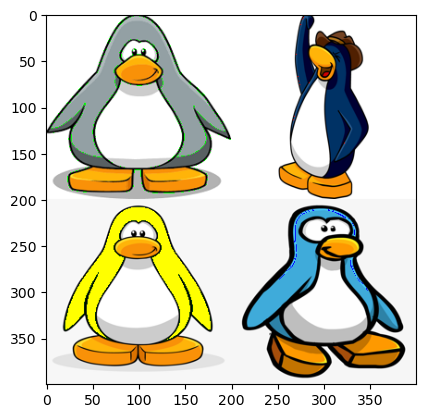

In [107]:
np_espelhada = np.zeros(shape=np_final.shape)
np_espelhada = np_final[:, ::-1, :] #Espelhando em cima do eixo y
plt.imshow(np_espelhada)
plt.savefig('Questao3.png')


## Questao 4 
Recortar meu pinguin favorito

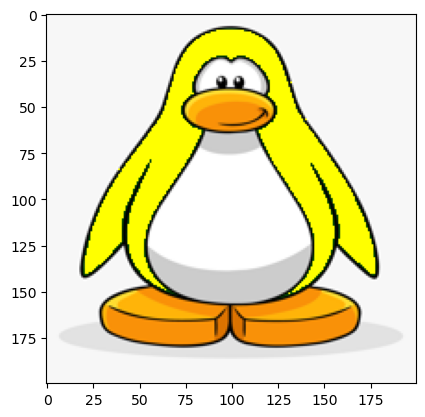

In [108]:
pinguim_amarelo = np_espelhada[200:400, 0:200, :] #Recortando a imagem do pinguim amarelo

plt.imshow(pinguim_amarelo)
plt.savefig('Questao4.png')

## Questao 5
Faça a analise do histograma em seu pinguim favorito e escolha um valor de threshold.  (Justifique a escolha do threshold) 

In [109]:
#Funçao gerada para gerar o histograma
def histogram_gray(img):
    (l, c) = img.shape
    # Histograma com 1 linha e 256 colunas, preenchido com 0.
    histogram = np.zeros(256, dtype=np.int32)

    for i in range(l):
        for j in range(c):
            # Normalizar intensidade do pixel 
            intensity = img[i, j]
            # Incrementar de 1 a quantidade de pixels no histograma,
            # utilizando a intensidade como índice.
            histogram[intensity] += 1
            
    return histogram

def show_histogram(img):
    histogram_r = histogram_gray(img[:, :, 0])
    histogram_g = histogram_gray(img[:, :, 1])
    histogram_b = histogram_gray(img[:, :, 2])
    
    plt.figure(figsize=(16, 16))
    plt.subplot(2, 1, 1)
    plt.imshow(img, cmap='gray', vmin=0, vmax=255)
    plt.subplot(2, 1, 2)
    plt.bar(range(256), histogram_r, color='red')
    plt.bar(range(256), histogram_g, color='green')
    plt.bar(range(256), histogram_b, color='blue')
    plt.savefig('questao5.png')

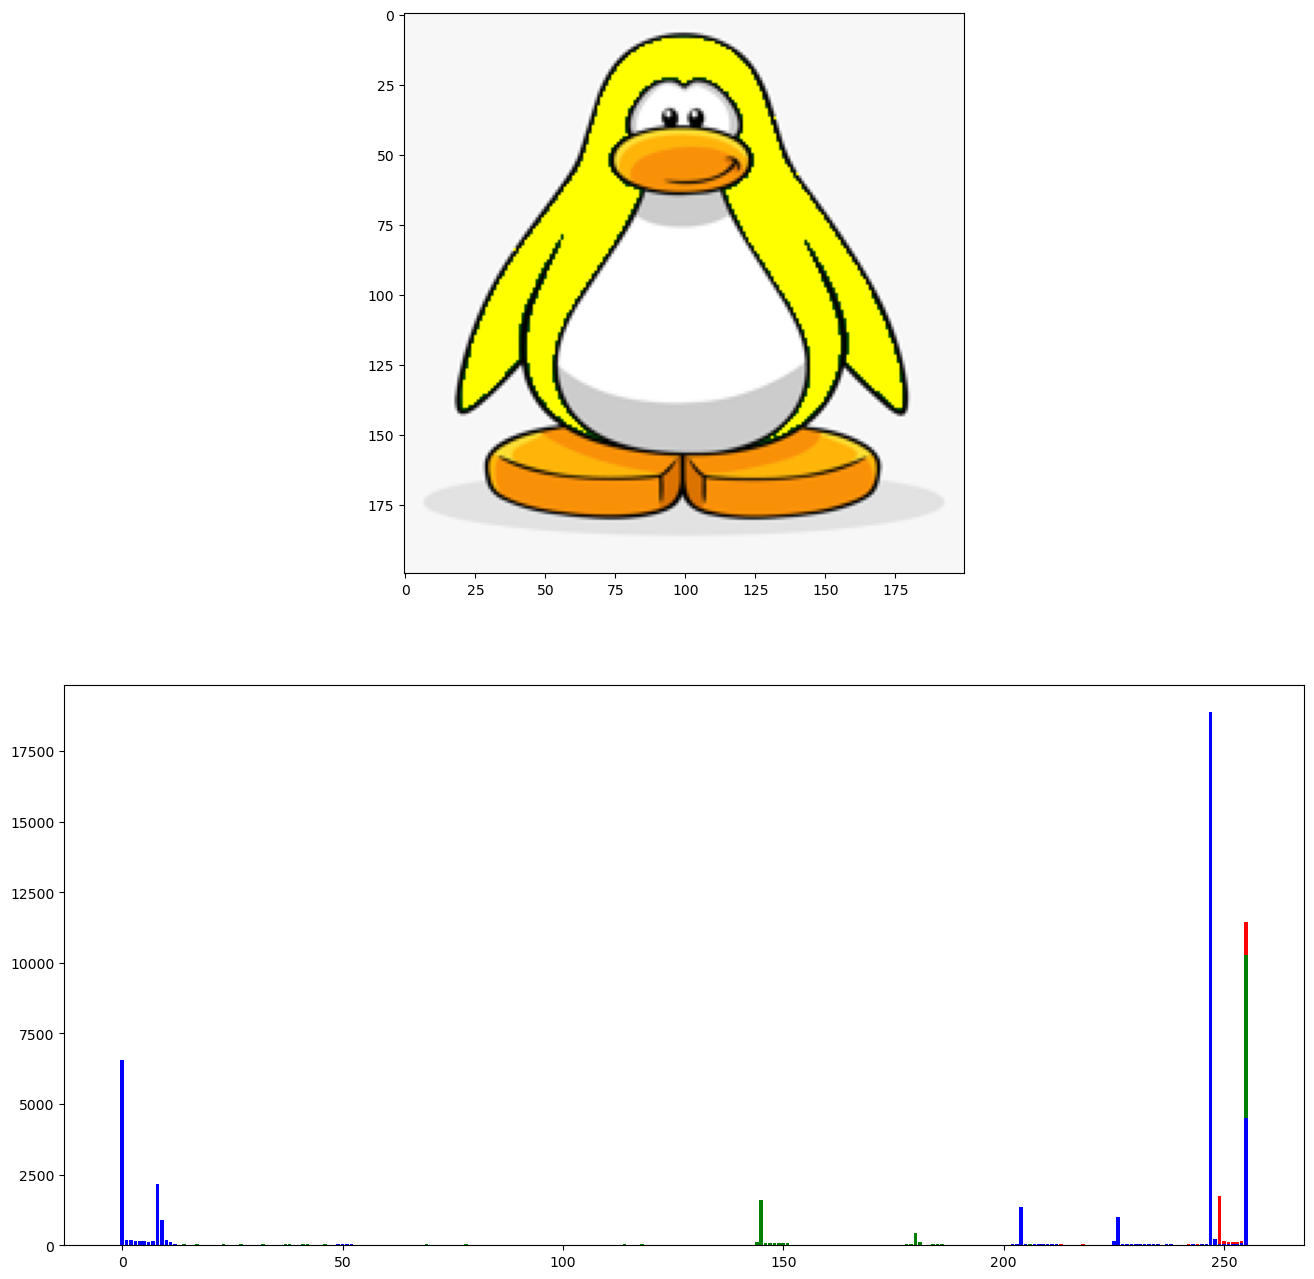

In [110]:
show_histogram(pinguim_amarelo)

Sobre a analise do valor do threshold. Eu optei por deixar em 170. Pois > 170 corresponde ao  corpo do pinguim(amarelo). E < 170 corresponde ao fundo. Logo, acredito que seja um bom limiar

## Questao 6
Aplique uma conversão para que todos os pixeis abaixo dele sejam pintados de sua cor favorita (por exemplo: Azul) 

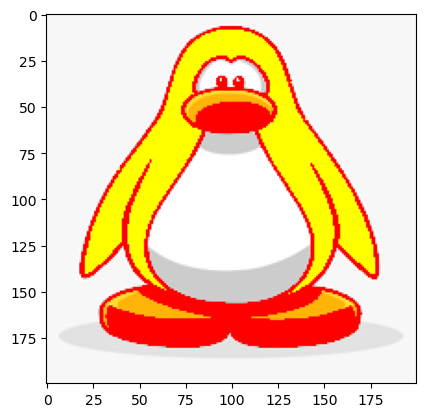

<Figure size 640x480 with 0 Axes>

In [112]:
threshold = 170
canal_verde = pinguim_amarelo[:, :, 1]
mascara = canal_verde < threshold 
# A máscara é um array booleano que indica onde a condição é verdadeira
pinguim_amarelo[mascara] = [255, 0, 0]  # cor vermelha
plt.imshow(pinguim_amarelo)
plt.show()
plt.savefig('Questao6.png')